In [1]:
import numpy as np
import datetime
import os
import random
import pickle
from glob import glob

from src.data_preparation import coloc_dataset
from src.modelling import model_distri

import src.utils.tardisml_utils as tardisml_utils

2023-08-14 15:38:24.629383: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def check_valid_days(arr_days):
    '''Check that ICESat2 colocated dataset is avalaible for each days
    If no data for one day, it is removed from the list
    
    Parameters:
    ------------
    
        arr_days     :    1D numpy array of datetime object. contains all days to be loaded in dataset
    '''

    dir_IS2 = '/scratch/project_465000269/edelleo1/Leo/SIT_observations/ICESat2_co_TOPAZ/'
    ndays = len(arr_days)
    
    for idx, dy in enumerate(arr_days[::-1]):
        str_date = f'{dy.strftime("%Y%m%d")}'
        if not os.path.exists(os.path.join(dir_IS2, str_date)):
            arr_days = np.delete(arr_days, ndays-(idx+1))
#             print(f'Index {idx} removed: {str_date}')
            
    return arr_days

In [3]:
rootdir = tardisml_utils.get_rootdir()

# ml_dir = 'Leo/results/distri_ml/ml/'

# create new folder to store results
str_date = datetime.datetime.now().strftime('%y%m%d-%H%M%S')
folder_name = f'distri_{str_date}'

abs_path = os.path.join(rootdir, f'Leo/results/')
path = os.path.join(abs_path, folder_name)
os.mkdir(path)
print(f'Folder created: {path}')


subpath_ml = os.path.join(path, 'ml/')
os.mkdir(subpath_ml)

subpath_fig = os.path.join(path, 'figures/')
os.mkdir(subpath_fig)


ml_dir = f'Leo/results/{folder_name}/ml/'
fig_dir = f'Leo/results/{folder_name}/figures/'

Folder created: /scratch/project_465000269/edelleo1/Leo/results/distri_230814-153844


In [63]:
from importlib import reload

In [148]:
reload(coloc_dataset)

<module 'src.data_preparation.coloc_dataset' from '/users/edelleo1/tardis/tardis-ml/src/data_preparation/coloc_dataset.py'>

In [149]:
# ----------------------------------------
#               Import dataset
# ----------------------------------------

# Dates to import dataset
d1 = datetime.datetime(2018, 10, 14)
d2 = datetime.datetime(2018, 10, 20) 
# d2 = datetime.datetime(2019, 4, 30)
# d2 = datetime.datetime(2019, 10, 14) 

tmp_days = np.array([d1 + datetime.timedelta(days=x) for x in range((d2-d1).days + 1)])
# remove non valid days
all_days = check_valid_days(tmp_days)


# ['SIT', 'month', 'lat', 'lon', 'siconc', 'sisnthick', 'zos', 'vxsi', 'vysi', 
# '2T', 'MSL', 'TP', '10V', '10U', 'SSR', 'STR', 'sia']
var_to_exclude = ['lon', 'sia']


ds = coloc_dataset.DatasetTrain(days=all_days, rootdir=rootdir, ml_dir=ml_dir, y_as_proba=True)


ds.exclude_var(var_to_exclude=var_to_exclude)

ds.check_nan()
ds.dataset_split()
ds.assemble_dataset(scaling=True, var_to_exclude=var_to_exclude)

Importing...
	 2018-10-14
	 2018-10-15
	 2018-10-16
	 2018-10-17
	 2018-10-18
	 2018-10-19
	 2018-10-20
Variable: lon excluded
Variable: sia excluded
Size of the training set:    2315 TOPAZ pixels
Size of the validation set:   496 TOPAZ pixels
Size of the test set:         497 TOPAZ pixels
Scaling data...
Scaler saved as: /scratch/project_465000269/edelleo1/Leo/results/distri_230814-153844/ml/ScalerMM_15feat_03.pkl
Dataset assembled


In [107]:
ds.sp_distri.shape

(3308, 1000)

(array([0.6828125 , 0.492     , 0.10185185, 0.03095238, 0.00123137]),
 array([ 0.  ,  0.64,  1.39,  2.47,  4.57, 20.  ]),
 <BarContainer object of 5 artists>)

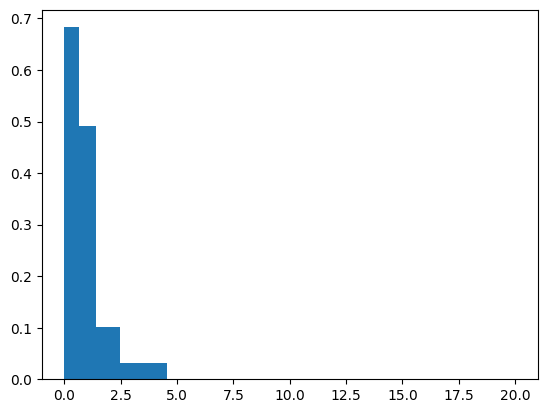

In [110]:
plt.hist(ds.sp_distri[0], bins=bins_tp5, density=True)

In [152]:
from src.visualization import visu_mdl_distri as vmd

In [153]:
ds.y[0]

array([0.459, 0.356, 0.106, 0.061, 0.018])

In [155]:
ds.y[1]

array([0.198, 0.63 , 0.146, 0.024, 0.002])

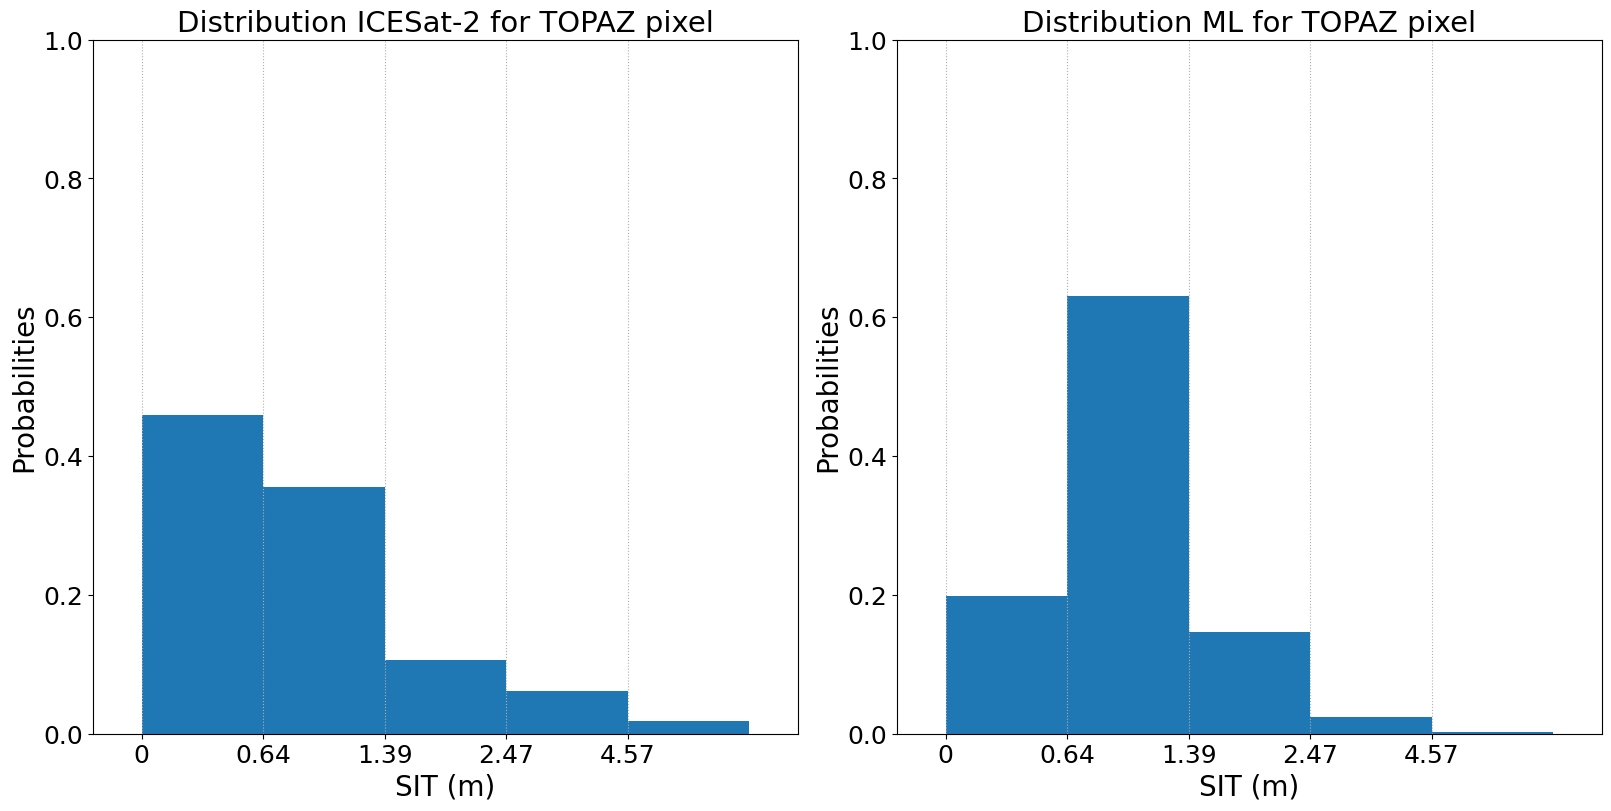

In [154]:
vmd.hist_proba_yt_yp_icecat(ds.y[0], ds.y[1],savefig=False, showfig=True)

In [113]:
ds.y.shape

(3308, 5)

In [118]:
np.histogram(ds.sp_distri[10], bins=bins_tp5, density=True)

(array([1.478125  , 0.052     , 0.00925926, 0.00238095, 0.        ]),
 array([ 0.  ,  0.64,  1.39,  2.47,  4.57, 20.  ]))

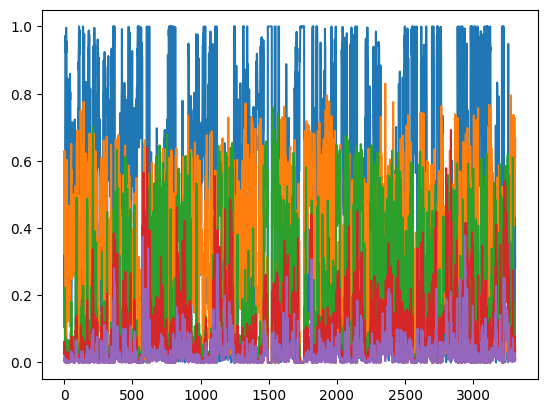

In [150]:
plt.plot(ds.y)

In [7]:
# probability to be in bins:
ds.dataset['Xtrain'].shape

(17432, 15)

In [102]:
ds.sp_distri.shape

(3308, 5)

In [9]:
ds.dataset['ytrain'].shape

(17432, 1000)

In [11]:
yt = ds.dataset['ytrain'][:,0]

In [15]:
hist, bins = np.histogram(yt)

In [19]:
import matplotlib.pyplot as plt

In [51]:
bins = np.array([0, 0.64, 1.39, 2.47, 4.57, 30])

(array([1.3542e+04, 2.7830e+03, 6.9300e+02, 2.5500e+02, 8.5000e+01,
        3.6000e+01, 2.6000e+01, 6.0000e+00, 3.0000e+00, 3.0000e+00]),
 array([ 0.        ,  1.83694151,  3.67388301,  5.51082452,  7.34776602,
         9.18470753, 11.02164903, 12.85859054, 14.69553205, 16.53247355,
        18.36941506]),
 <BarContainer object of 10 artists>)

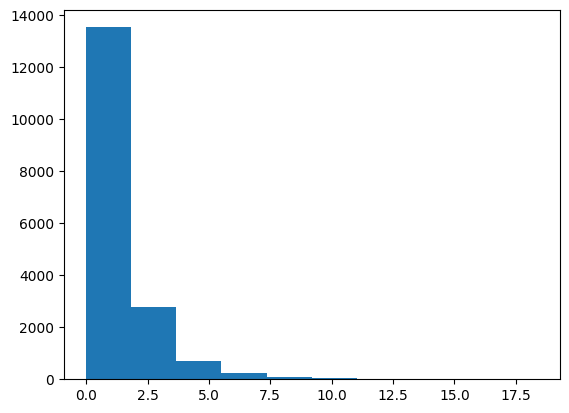

In [21]:
plt.hist(yt)

In [25]:
plt.hist?

(array([1.25      , 0.26666667, 0.        , 0.        , 0.        ]),
 array([ 0.  ,  0.64,  1.39,  2.47,  4.57, 20.  ]),
 <BarContainer object of 5 artists>)

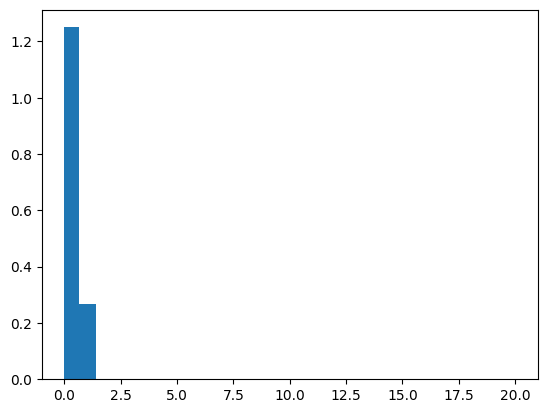

In [96]:
plt.hist(ds.dataset['ytrain'][0,:], bins_tp5, density=True)

(array([4., 1., 0., 0., 0.]),
 array([ 0.  ,  0.64,  1.39,  2.47,  4.57, 20.  ]),
 <BarContainer object of 5 artists>)

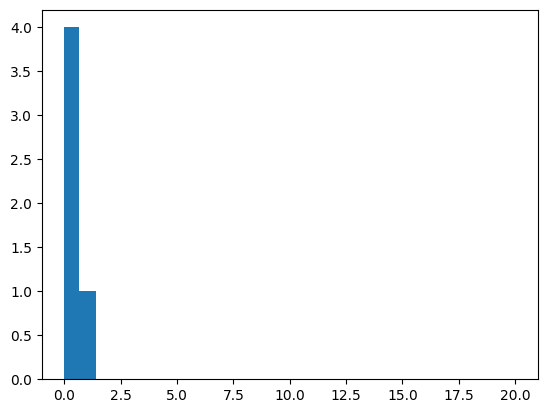

In [97]:
plt.hist(ds.dataset['ytrain'][0,:], bins_tp5)

(array([0.60198199, 0.36354597, 0.19477802, 0.0439531 , 0.00255413]),
 array([ 0.  ,  0.64,  1.39,  2.47,  4.57, 20.  ]),
 <BarContainer object of 5 artists>)

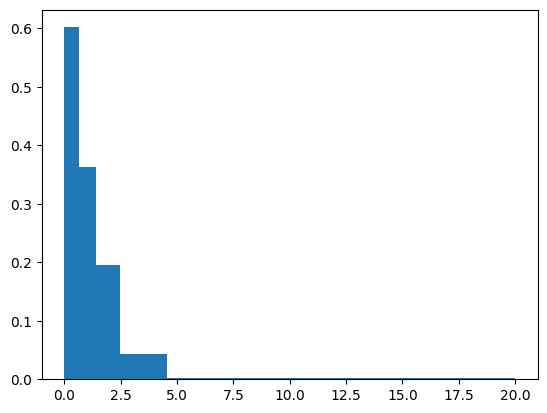

In [72]:
plt.hist(yt, bins_tp5, density=True)

In [76]:
np.histogram(yt, bins=bins_tp5, density=True)

(array([0.60198199, 0.36354597, 0.19477802, 0.0439531 , 0.00255413]),
 array([ 0.  ,  0.64,  1.39,  2.47,  4.57, 20.  ]))

In [119]:
hist_wdensity(ds.sp_distri[10], bins_tp5)

array([1.478125  , 0.052     , 0.00925926, 0.00238095, 0.        ])

In [83]:
def hist_wdensity(arr, bins):
    arr_hist , edges = np.histogram(arr, bins=bins)
    samp = arr_hist / (arr.shape[0] * np.diff(edges))
    return samp

In [137]:
yt = ds.sp_distri[10]

In [139]:
myarray = yt

In [140]:
weights = np.ones_like(myarray)/float(len(myarray))

In [141]:
weights

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001,

In [147]:
np.histogram(myarray, bins=bins_tp5, weights=weights)[0]

array([0.946, 0.039, 0.01 , 0.005, 0.   ])

(array([0.946, 0.039, 0.01 , 0.005, 0.   ]),
 array([ 0.  ,  0.64,  1.39,  2.47,  4.57, 20.  ]),
 <BarContainer object of 5 artists>)

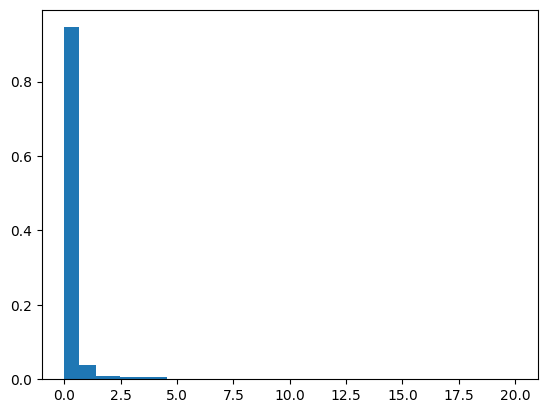

In [143]:
plt.hist(myarray, bins=bins_tp5, weights=weights)

(array([1.478125  , 0.052     , 0.00925926, 0.00238095, 0.        ]),
 array([ 0.  ,  0.64,  1.39,  2.47,  4.57, 20.  ]),
 <BarContainer object of 5 artists>)

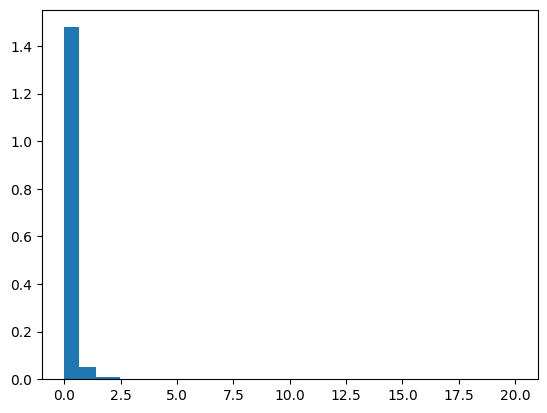

In [145]:
plt.hist(myarray, bins=bins_tp5, density=True)

In [38]:
ds.sp_tp.shape[0]

24904

In [33]:
ds.sp_distri.shape

(24904, 1000)

In [35]:
np.histogram?

In [85]:
n = ds.sp_distri.shape[0]
nbins = len(bins)-1

y_prob = np.zeros((n, nbins))

In [86]:
y_prob.shape

(3308, 5)

In [87]:
for idx in range(n):
    y_prob[idx] = np.histogram(ds.sp_distri[idx], bins=bins, density=True)[0]

In [90]:
for idx in range(n):
    y_prob[idx] = hist_wdensity(ds.sp_distri[idx], bins=bins)

In [91]:
y_prob

array([[1.25      , 0.26666667, 0.        , 0.        , 0.        ],
       [1.25      , 0.26666667, 0.        , 0.        , 0.        ],
       [1.5625    , 0.        , 0.        , 0.        , 0.        ],
       ...,
       [1.25      , 0.26666667, 0.        , 0.        , 0.        ],
       [0.9375    , 0.53333333, 0.        , 0.        , 0.        ],
       [1.25      , 0.26666667, 0.        , 0.        , 0.        ]])

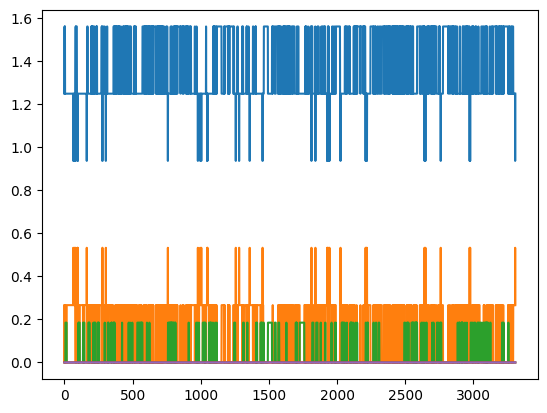

In [92]:
plt.plot(y_prob)